In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Figure size 720x540 with 0 Axes>

In [3]:
atk_back = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back.csv')
atk_bufov = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_BufferOverflow.csv')
atk_ftpw = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_FTPWrite.csv')
atk_guesspass = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_GuessPassword.csv')
atk_nept = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_Neptune.csv')
atk_nmap = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_NMap.csv')
atk_normal = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_Normal.csv')
atk_portsweep = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_PortSweep.csv')
atk_rootkit = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_RootKit.csv')
atk_satan = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_Satan.csv')
atk_smurf = pd.read_csv('D:/python/Machine Learning/Modelling case studies/cyber_aatck_casestudy/Data_of_Attack_Back_Smurf.csv')

In [14]:
# In our dataset all the columns names are not proper so we are giving them correct format in the below code:-

atk_smurf = atk_smurf.rename(columns={'duration':'duration', ' protocol_type':'protocol_type', ' service':'service', ' flag':'flag', ' src_bytes':'src_bytes', ' dst_bytes':'dst_bytes', ' land':'land', ' wrong_fragment':'wrong_fragment', ' urgent':'urgent', ' hot':'hot', ' num_failed_logins':'num_failed_logins', ' logged_in':'logged_in', ' num_compromised':'num_compromised', ' root_shell':'root_shell', ' su_attempted':'su_attempted', ' num_root':'num_root', ' num_file_creations':'num_file_creations',
                        ' num_shells':'num_shells', ' num_access_files':'num_access_files', ' num_outbound_cmds':'num_outbound_cmds', ' is_host_login':'is_host_login', ' is_guest_login':'is_guest_login', ' count':'count', ' srv_count':'srv_count', ' serror_rate':'serror_rate', ' srv_error_rate':'srv_error_rate', ' rerror_rate':'rerror_rate', ' srv_rerror_rate':'srv_rerror_rate', ' same_srv_rate':'same_srv_rate', ' diff_srv_rate':'diff_srv_rate', ' srv_diff_host_rate':'srv_diff_host_rate',
                        ' dst_host_count':'dst_host_count', ' dst_host_srv_count':'dst_host_srv_count', ' dst_host_same_srv_rate':'dst_host_same_srv_rate', ' dst_host_diff_srv_rate':'dst_host_diff_srv_rate', ' dst_host_same_src_port_rate':'dst_host_same_src_port_rate', ' dst_host_srv_diff_host_rate':'dst_host_srv_diff_host_rate', ' dst_host_serror_rate':'dst_host_serror_rate', ' dst_host_srv_serror_rate':'dst_host_srv_serror_rate', ' dst_host_rerror_rate':'dst_host_rerror_rate', ' dst_host_srv_rerror_rate':'dst_host_srv_rerror_rate'})

In [15]:
atk_normal['attack'] = 0
atk_back['attack'] = 1
atk_bufov['attack'] = 2
atk_ftpw['attack'] = 3
atk_guesspass['attack'] = 4
atk_nept['attack'] = 5
atk_nmap['attack'] = 6
atk_portsweep['attack'] = 7
atk_rootkit['attack'] = 8
atk_satan['attack'] = 9
atk_smurf['attack'] = 10

In [16]:
atk_ftpw.columns

Index(['0.0026', ' 0', ' 0.07', ' 0.1', ' 0.00116', ' 0.00451', ' 0.2', ' 0.3',
       ' 0.4', ' 0.2.1', ' 0.5', ' 0.1.1', ' 0.6', ' 0.7', ' 0.8', ' 0.9',
       ' 0.1.2', ' 0.10', ' 0.1.3', ' 0.11', ' 0.12', ' 0.1.4', ' 0.001',
       ' 0.001.1', ' 0.13', ' 0.14', ' 0.15', ' 0.16', ' 0.1.5', ' 0.17',
       ' 0.18', ' 0.001.2', ' 0.001.3', ' 0.1.6', ' 0.19', ' 0.1.7', ' 0.20',
       ' 0.21', ' 0.22', ' 0.23', ' 0.24', 'attack'],
      dtype='object')

In [17]:
atk_ftpw = atk_ftpw.rename(columns={'0.0026':'duration', ' 0':'protocol_type', ' 0.07':'service', ' 0.1':'flag', ' 0.00116':'src_bytes', ' 0.00451':'dst_bytes', ' 0.2':'land', ' 0.3':'wrong_fragment', ' 0.4':'urgent', ' 0.2.1':'hot', ' 0.5':'num_failed_logins', ' 0.1.1':'logged_in', ' 0.6':'num_compromised', ' 0.7':'root_shell', ' 0.8':'su_attempted', ' 0.9':'num_root', ' 0.1.2':'num_file_creations',
                        ' 0.10':'num_shells', ' 0.1.3':'num_access_files', ' 0.11':'num_outbound_cmds', ' 0.12':'is_host_login', ' 0.1.4':'is_guest_login', ' 0.001':'count', ' 0.001.1':'srv_count', ' 0.13':'serror_rate', ' 0.14':'srv_error_rate', ' 0.15':'rerror_rate', ' 0.16':'srv_rerror_rate', ' 0.1.5':'same_srv_rate', ' 0.17':'diff_srv_rate', ' 0.18':'srv_diff_host_rate',
                        ' 0.001.2':'dst_host_count', ' 0.001.3':'dst_host_srv_count', ' 0.1.6':'dst_host_same_srv_rate', ' 0.19':'dst_host_diff_srv_rate', ' 0.1.7':'dst_host_same_src_port_rate', ' 0.20':'dst_host_srv_diff_host_rate', ' 0.21':'dst_host_serror_rate', ' 0.22':'dst_host_srv_serror_rate', ' 0.23':'dst_host_rerror_rate', ' 0.24':'dst_host_srv_rerror_rate'})

In [31]:
atk_back.shape

(968, 42)

In [19]:
atk_bufov.shape

(30, 42)

In [21]:
atk_ftpw.shape

(7, 42)

In [22]:
atk_guesspass.shape


(53, 42)

In [23]:
atk_nept.shape

(227228, 42)

In [24]:
atk_nmap.shape

(1554, 42)

In [25]:
atk_normal.shape

(576710, 42)

In [26]:
atk_portsweep.shape

(2964, 42)

In [27]:
atk_rootkit.shape

(10, 42)

In [28]:
atk_satan.shape

(5019, 42)

In [29]:
atk_smurf.shape

(3007, 42)

In [32]:
from sklearn.utils import resample

In [33]:
# We are doing undersampling in this case as we have lot of rows:-
atk_back = resample(atk_back , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_bufov = resample(atk_bufov , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_ftpw = resample(atk_ftpw , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_guesspass = resample(atk_guesspass , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_nept = resample(atk_nept , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_nmap = resample(atk_nmap , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_normal = resample(atk_normal , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_portsweep = resample(atk_portsweep , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_rootkit = resample(atk_rootkit , replace = True , n_samples = len(atk_satan) , random_state = 27)
atk_smurf = resample(atk_smurf , replace = True , n_samples = len(atk_satan) , random_state = 27)

In [36]:
# now we will concat atk_satan and all the resampled tables:-

atk_sfinal = pd.concat([atk_back, atk_bufov, atk_ftpw, atk_guesspass, atk_nept, atk_nmap, atk_normal, atk_portsweep, atk_rootkit, atk_smurf, atk_satan] , axis=0).reset_index(drop = True)

In [39]:
atk_sfinal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.020,0.100,0.000,0.005,0.0,0.000,0.0,0.010,0.010,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.255,0.100,0.000,0.000,0.0,0.000,0.0,0.005,0.005,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.071,0.100,0.000,0.001,0.0,0.000,0.0,0.020,0.020,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.133,0.100,0.000,0.001,0.0,0.000,0.0,0.002,0.002,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.055,0.100,0.000,0.002,0.0,0.000,0.0,0.022,0.022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55204,0.0,0.02,0.06,0.0,0.00020,0.00000,0,0.0,0.0,0.0,...,0.003,0.001,0.076,0.001,0.0,0.003,0.0,0.062,0.000,9
55205,0.0,0.02,0.06,0.0,0.00020,0.00000,0,0.0,0.0,0.0,...,0.004,0.002,0.076,0.002,0.0,0.003,0.0,0.062,0.000,9
55206,0.0,0.02,0.06,0.0,0.00020,0.00000,0,0.0,0.0,0.0,...,0.001,0.002,0.008,0.003,0.0,0.000,0.0,0.002,0.000,9
55207,0.0,0.02,0.06,0.0,0.00020,0.00000,0,0.0,0.0,0.0,...,0.002,0.003,0.008,0.005,0.0,0.000,0.0,0.002,0.000,9


# PRE MODELING

# MODELING

### Data Preparation Level I

##### Type Casting

In [40]:
atk_sfinal.dtypes

duration                       float64
protocol_type                  float64
service                        float64
flag                           float64
src_bytes                      float64
dst_bytes                      float64
land                             int64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds                int64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_error_rate           

In [43]:
atk_sfinal['protocol_type'] = atk_sfinal['protocol_type'].astype('object') 

In [44]:
atk_sfinal['service'] = atk_sfinal['service'].astype('object') 

In [45]:
atk_sfinal['flag'] = atk_sfinal['flag'].astype('object')

In [46]:
# As we can see in this code that our dataset does not have any missing values.
atk_sfinal.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Split the data in numerical and categorical

In [47]:
num_col = [key for key in dict(atk_sfinal.dtypes) if dict(atk_sfinal.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_col = [key for key in dict(atk_sfinal.dtypes) if dict(atk_sfinal.dtypes)[key] in ['object']]

In [48]:
atk_sfinal_num = atk_sfinal[num_col]

In [49]:
atk_sfinal_cat = atk_sfinal[cat_col]

In [50]:
atk_sfinal_Y = atk_sfinal['attack']

In [51]:
# we'll remove the attack variable from numerical datframe
del atk_sfinal_num['attack']

#### Missing  Value and Outlier Treatment on the Numerical Columns

In [52]:
def outliers(y):
    y = y.clip(upper = y.quantile(0.95))
    y = y.clip(lower = y.quantile(0.05))
    return(y)

In [53]:
# There are no missing value in this dataframe
atk_sfinal_num.isna().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

<AxesSubplot:>

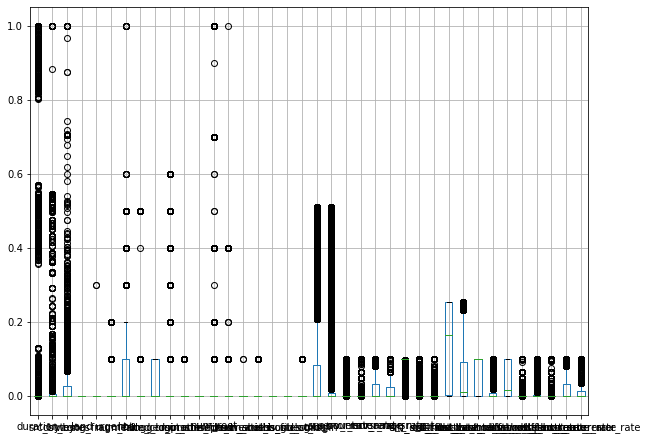

In [54]:
atk_sfinal_num.plot(kind = 'box')

In [55]:
atk_sfinal_num_cln = atk_sfinal_num.apply(outliers)

<AxesSubplot:>

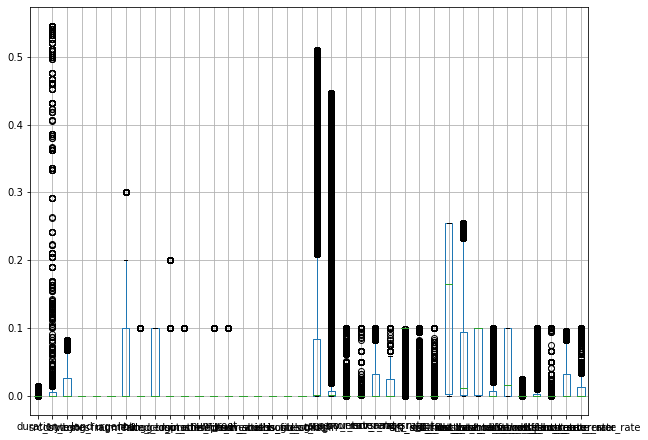

In [56]:
atk_sfinal_num_cln.plot(kind = 'box')

#### Missing  Value on the Categorical Columns

In [57]:
atk_sfinal_cat.isna().sum()

protocol_type    0
service          0
flag             0
dtype: int64

In [58]:
atk_sfinal_Y.isna().sum()

0

In [59]:
atk_sfinal_cat_cln_w_dummies = pd.get_dummies(atk_sfinal_cat , drop_first=True)

In [60]:
atk_sfinal_cat_cln_w_dummies.shape

(55209, 77)

In [61]:
len(atk_sfinal_Y)

55209

In [62]:
atk_sfinal_num_cln.shape

(55209, 38)

In [63]:
# Now we will concatinate all the Data frames to make one final dataframe to do our further operations.
atk_sfinal_cleaned = pd.concat([atk_sfinal_cat_cln_w_dummies , atk_sfinal_num_cln , atk_sfinal_Y] , axis = 1)

In [64]:
atk_sfinal_cleaned.shape

(55209, 116)

In [66]:
atk_sfinal_cleaned.isna().sum()

protocol_type_0.01          0
protocol_type_0.02          0
service_0.01                0
service_0.02                0
service_0.03                0
                           ..
dst_host_serror_rate        0
dst_host_srv_serror_rate    0
dst_host_rerror_rate        0
dst_host_srv_rerror_rate    0
attack                      0
Length: 116, dtype: int64

##############################################################

- Till this point our dataset is clean because:-
    - No Missing
    - No Outliers (Mild Outliers)
    - No Variables with incorrect data type

### RFE

In [67]:
from sklearn.feature_selection import RFE

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
target = atk_sfinal_cleaned['attack']

In [70]:
features = atk_sfinal_cleaned[atk_sfinal_cleaned.columns.difference(['attack'])]

In [71]:
### Initlaize the Linear Regression Model

lm = LinearRegression()

In [72]:
### Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=20)

In [73]:
## Fit the RFE Model

rfe = rfe.fit(features, target)

In [74]:
RFE_imp_vars = features.columns[rfe.get_support()]

In [76]:
list(RFE_imp_vars)

['diff_srv_rate',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 'duration',
 'is_guest_login',
 'is_host_login',
 'land',
 'logged_in',
 'num_access_files',
 'num_compromised',
 'num_outbound_cmds',
 'num_root',
 'protocol_type_0.02',
 'rerror_rate',
 'service_0.06',
 'service_0.09',
 'service_0.11',
 'srv_diff_host_rate']

### K Best

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [78]:
## Initalize the K Best Model

selector = SelectKBest(f_classif, k=20)

In [79]:
### Fit the model

selector.fit(features, target)

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 25  26  27  29  33  35 112 113 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=20)

In [80]:
k_best_20 = features.columns[selector.get_support()]

In [82]:
list(k_best_20)

['dst_bytes',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'flag_0.06',
 'flag_0.07',
 'hot',
 'logged_in',
 'num_failed_logins',
 'protocol_type_0.02',
 'rerror_rate',
 'same_srv_rate',
 'service_0.05',
 'service_0.09',
 'src_bytes',
 'srv_count',
 'srv_rerror_rate']

In [83]:
selected_vars = {'diff_srv_rate',
 'dst_bytes',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 'duration',
 'is_guest_login',
 'is_host_login',
 'land',
 'logged_in',
 'num_access_files',
 'num_compromised',
 'num_outbound_cmds',
 'num_root',
 'protocol_type_0.02',
 'rerror_rate',
 'service_0.06',
 'service_0.09',
 'service_0.11',
 'srv_diff_host_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'flag_0.06',
 'flag_0.07',
 'hot',
 'logged_in',
 'num_failed_logins',
 'protocol_type_0.02',
 'rerror_rate',
 'same_srv_rate',
 'service_0.05',
 'service_0.09',
 'src_bytes',
 'srv_count',
 'srv_rerror_rate'}

In [84]:
selected_vars = list(selected_vars)

In [85]:
features_reduced = features[selected_vars]

In [86]:
features_reduced.shape

(55209, 33)

In [87]:
features_reduced.columns

Index(['diff_srv_rate', 'dst_host_same_srv_rate', 'duration', 'same_srv_rate',
       'service_0.09', 'rerror_rate', 'src_bytes', 'is_guest_login',
       'dst_host_count', 'land', 'num_root', 'dst_bytes', 'hot',
       'service_0.06', 'dst_host_serror_rate', 'is_host_login',
       'num_access_files', 'dst_host_rerror_rate', 'srv_count', 'logged_in',
       'protocol_type_0.02', 'num_outbound_cmds', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'num_compromised', 'flag_0.06', 'flag_0.07', 'service_0.05',
       'srv_rerror_rate', 'srv_diff_host_rate', 'service_0.11',
       'num_failed_logins'],
      dtype='object')

### VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [89]:
VIF = [variance_inflation_factor(features_reduced.values,i) for i in range(features_reduced.shape[1])]

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [90]:
VIF = pd.Series(VIF, name = 'VIF')

In [91]:
cols = pd.Series(features_reduced.columns, name='Column_Name')

In [92]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [93]:
VIF_20 = VIF_res.sort_values(by=['VIF'], ascending = False).head(20)

In [94]:
VIF_20

,Column_Name,VIF
31,service_0.11,inf
4,service_0.09,inf
20,protocol_type_0.02,inf
13,service_0.06,inf
29,srv_rerror_rate,45.289315
24,dst_host_srv_rerror_rate,34.231350
5,rerror_rate,31.094077
1,dst_host_same_srv_rate,18.477961
3,same_srv_rate,18.344371
8,dst_host_count,9.982882


In [95]:
features_reduced2 = features_reduced[features_reduced.columns.difference(['service_0.11'])]

VIF = [variance_inflation_factor(features_reduced2.values,i) for i in range(features_reduced2.shape[1])]

VIF = pd.Series(VIF, name = 'VIF')

cols = pd.Series(features_reduced2.columns, name='Column_Name')

VIF_res = pd.concat([cols,VIF],axis=1)

VIF_20 = VIF_res.sort_values(by=['VIF'], ascending = False).head(20)

VIF_20

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Column_Name,VIF
22,protocol_type_0.02,1385.428178
27,service_0.09,847.976221
26,service_0.06,547.632485
31,srv_rerror_rate,45.297859
8,dst_host_srv_rerror_rate,34.232441
23,rerror_rate,31.094115
4,dst_host_same_srv_rate,18.492265
24,same_srv_rate,18.368758
2,dst_host_count,9.983693
16,logged_in,9.318316


In [97]:
final_vars = pd.concat([features_reduced2 , atk_sfinal_cleaned['attack']] , axis=1) 

### Data Preparation Level 4 : Resampling Data --> train and test

In [111]:
train,test = train_test_split(final_vars, test_size = 0.3, random_state = 123)

In [112]:
X = final_vars[final_vars.columns.difference(['attack'])]
y = final_vars.attack

In [113]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state= 123)

In [114]:
train_y.shape

(38646,)

In [115]:
test_y.shape

(16563,)

In [116]:
model = LogisticRegression()

In [117]:
model = model.fit(train_X , train_y)

C:\Users\akhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
pred_model = model.predict(train_X)

In [125]:
train_auc = metrics.accuracy_score(train.attack, pred_model)
print(train_auc)

0.9146095326812607


In [126]:
pred_model_test = model.predict(test_X)
test_auc = metrics.accuracy_score(test.attack, pred_model_test)
print(test_auc)


0.9172251403731209


In [127]:
#Calculating Gini (somerceD) for train & Test

In [128]:
train_gini = 2*metrics.accuracy_score(train.attack, pred_model)-1
print(train_gini)

test_gini = 2*metrics.accuracy_score(test.attack, pred_model_test)-1
print(test_gini)

0.8292190653625213
0.8344502807462417
